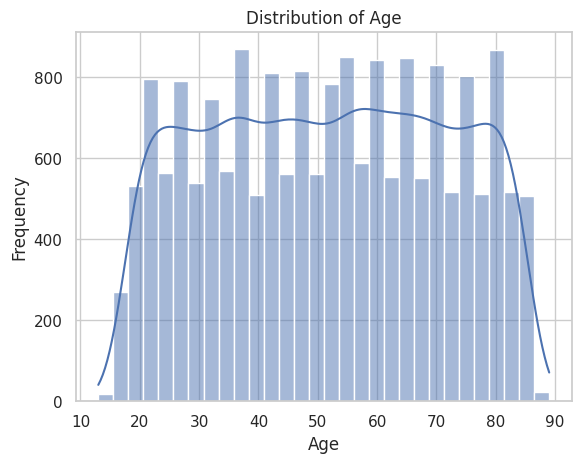

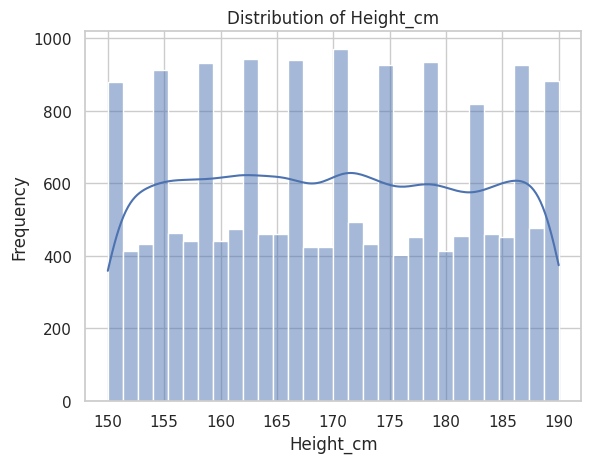

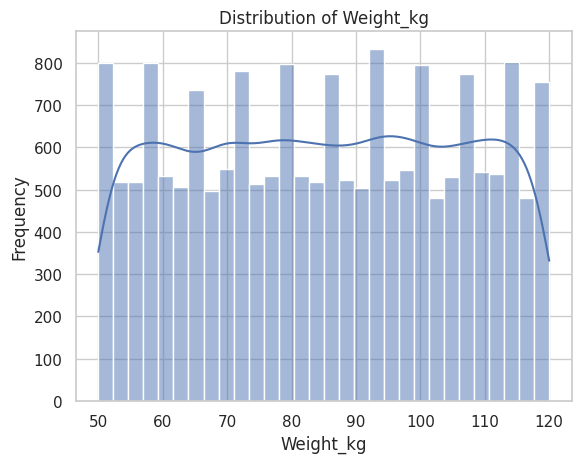

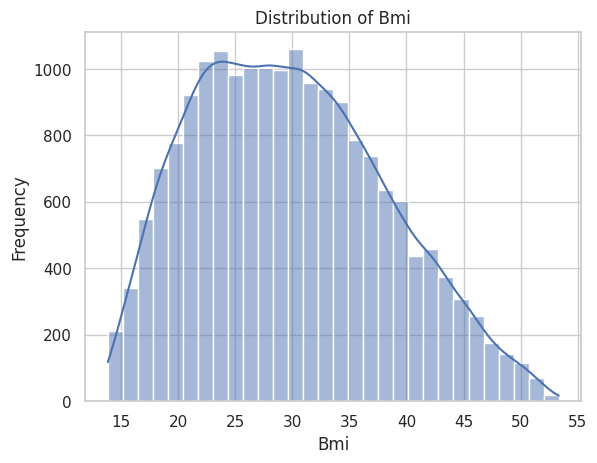

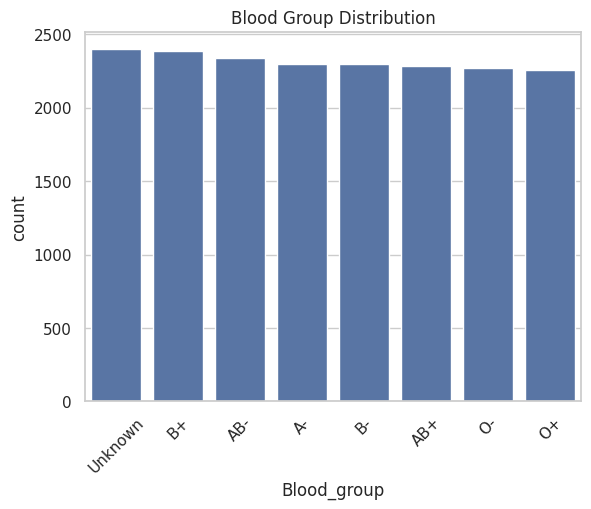

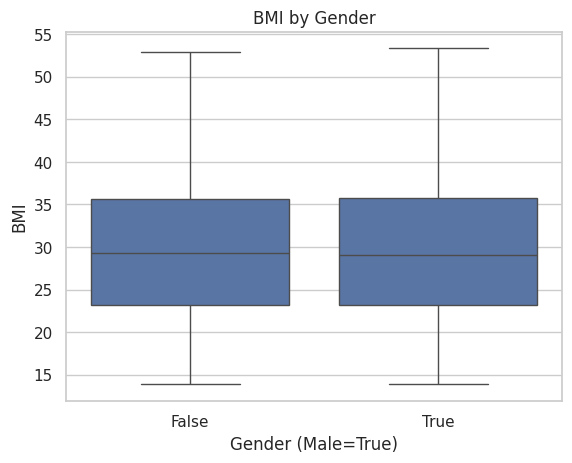

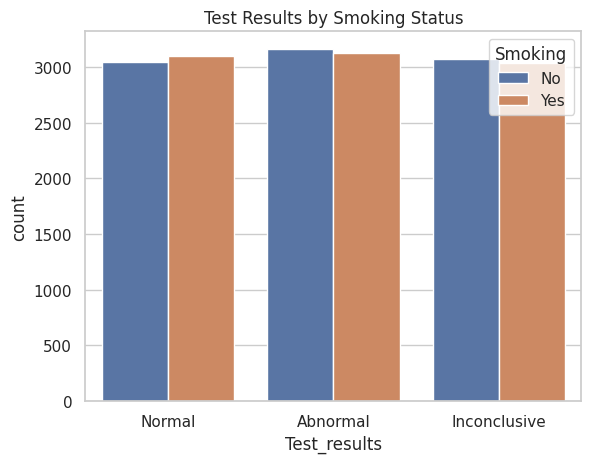

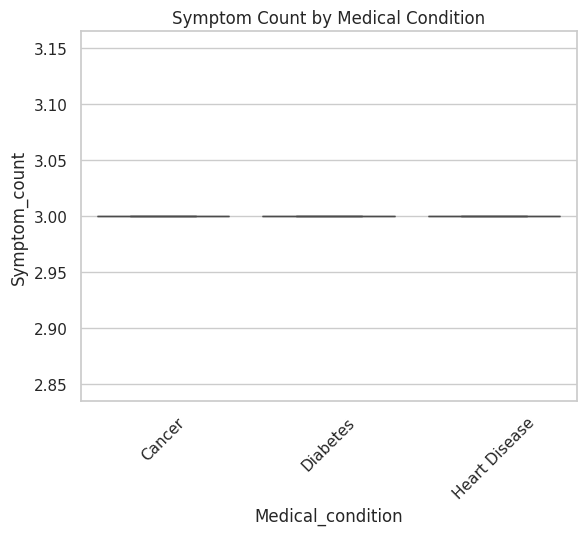

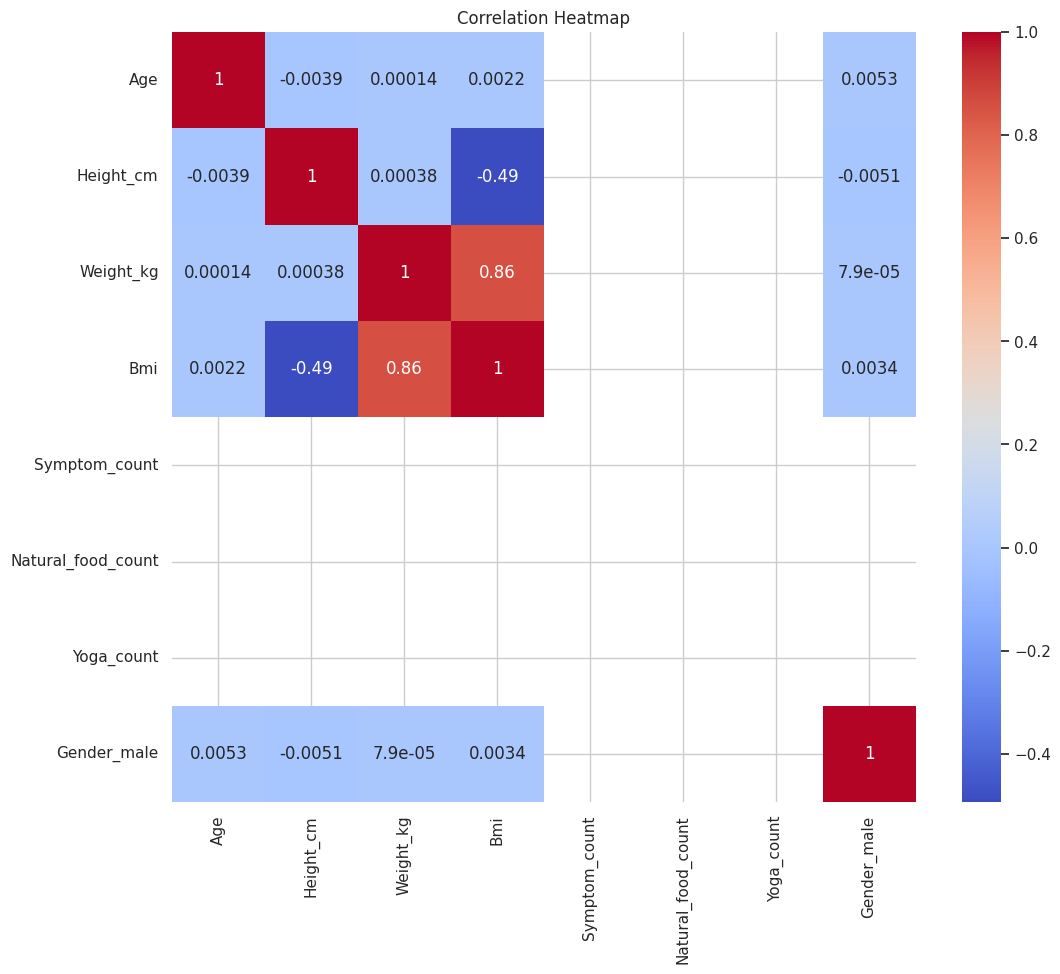

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

# Load dataset
df = pd.read_csv("/content/cleaned_dataset (4).csv")

# --- Univariate Analysis ---

# Plot distributions for numeric features
numeric_cols = ['Age', 'Height_cm', 'Weight_kg', 'Bmi']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plot for Blood Group
plt.figure()
sns.countplot(x='Blood_group', data=df, order=df['Blood_group'].value_counts().index)
plt.title('Blood Group Distribution')
plt.xticks(rotation=45)
plt.show()

# --- Feature Engineering for EDA ---
# Convert list strings to actual lists
df['Symptom_count'] = df['Symptom'].apply(lambda x: len(ast.literal_eval(x)))
df['Natural_food_count'] = df['Natural_food'].apply(lambda x: len(ast.literal_eval(x)))
df['Yoga_count'] = df['Yoga'].apply(lambda x: len(ast.literal_eval(x)))

# --- Bivariate Analysis ---

# Boxplot of BMI by Gender
plt.figure()
sns.boxplot(x='Gender_male', y='Bmi', data=df)
plt.title('BMI by Gender')
plt.xlabel('Gender (Male=True)')
plt.ylabel('BMI')
plt.show()

# Test Results by Smoking
plt.figure()
sns.countplot(x='Test_results', hue='Smoking', data=df)
plt.title('Test Results by Smoking Status')
plt.show()

# Symptom Count by Medical Condition
plt.figure()
sns.boxplot(x='Medical_condition', y='Symptom_count', data=df)
plt.title('Symptom Count by Medical Condition')
plt.xticks(rotation=45)
plt.show()

# --- Correlation Matrix ---
# Convert 'Gender_male' to int for correlation
df['Gender_male'] = df['Gender_male'].astype(int)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Age', 'Height_cm', 'Weight_kg', 'Bmi', 'Symptom_count', 'Natural_food_count', 'Yoga_count', 'Gender_male']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

import pandas as pd
import ast

df = pd.read_csv("/content/cleaned_dataset (4).csv")

df_fe = df.copy()

df_fe['Symptom_count'] = df_fe['Symptom'].apply(lambda x: len(ast.literal_eval(x)))
df_fe['Natural_food_count'] = df_fe['Natural_food'].apply(lambda x: len(ast.literal_eval(x)))
df_fe['Yoga_count'] = df_fe['Yoga'].apply(lambda x: len(ast.literal_eval(x)))

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df_fe['Bmi_category'] = df_fe['Bmi'].apply(categorize_bmi)

categorical_cols = ['Medical_condition', 'Test_results', 'Smoking', 'Alcohol_status', 'Bmi_category']
df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

df_fe.drop(columns=['Symptom', 'Natural_food', 'Yoga'], inplace=True)

print(df_fe.head())


   Age  Height_cm  Weight_kg    Bmi  Gender_male Blood_group  Symptom_count  \
0   30      188.0       83.0  23.48         True          B-              3   
1   28      157.0       59.0  23.94        False          O+              3   
2   43      170.0       60.0  20.76        False         AB+              3   
3   21      168.0       52.0  18.42        False         AB-              3   
4   20      172.0       64.0  21.63        False     Unknown              3   

   Natural_food_count  Yoga_count  Medical_condition_Diabetes  \
0                   3           2                       False   
1                   3           2                        True   
2                   3           2                       False   
3                   3           2                        True   
4                   3           2                       False   

   Medical_condition_Heart Disease  Test_results_Inconclusive  \
0                            False                      False   
1   